ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import EarlyStopping
import IPython

time_steps = 7 # a week of steps
input_dim = 4 # OHL
histories = []

for i in range(len(ticker_names)):
    x_t = X_trains[i]
    y_t = Y_trains[i]
    x_cv = X_cvs[i]
    y_cv = Y_cvs[i]

    # Define early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss',  # Or 'val_accuracy' depending on what you want to monitor
                                min_delta=0.001,  # Minimum change to qualify as an improvement
                                patience= 15,  # How many epochs to wait before stopping
                                restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity
    
    model = Sequential([   
        LSTM(units= 256, return_sequences=True, input_shape=(time_steps, input_dim)),
        LSTM(units= 128, return_sequences=False),
        Dense(units= 64, activation='relu'),
        Dense(units= 1, activation='linear'),
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    history = model.fit(x_t, y_t, validation_data=(x_cv, y_cv) , epochs=100, batch_size=64, callbacks=[early_stopping])
    model.save(f'../LSTM/stock_mod/{ticker_names[i]}.h5')
    histories.append(history)

    IPython.display.clear_output()


In [16]:
import IPython
from keras.models import load_model
from tensorflow.keras.losses import mse

predictions = []
mses = []

for i in range(len(ticker_names)):
    model = load_model(f'../LSTM/stock_mod/{ticker_names[i]}.h5')
    prediction = model.predict(X_tests[i])
    prediction = prediction.flatten()
    predictions.append(prediction)
    mses.append(float(mse(Y_tests[i], prediction)))
    IPython.display.clear_output()

print(f'Mean Squared Error: {mses}')


Mean Squared Error: [0.020693352445960045]


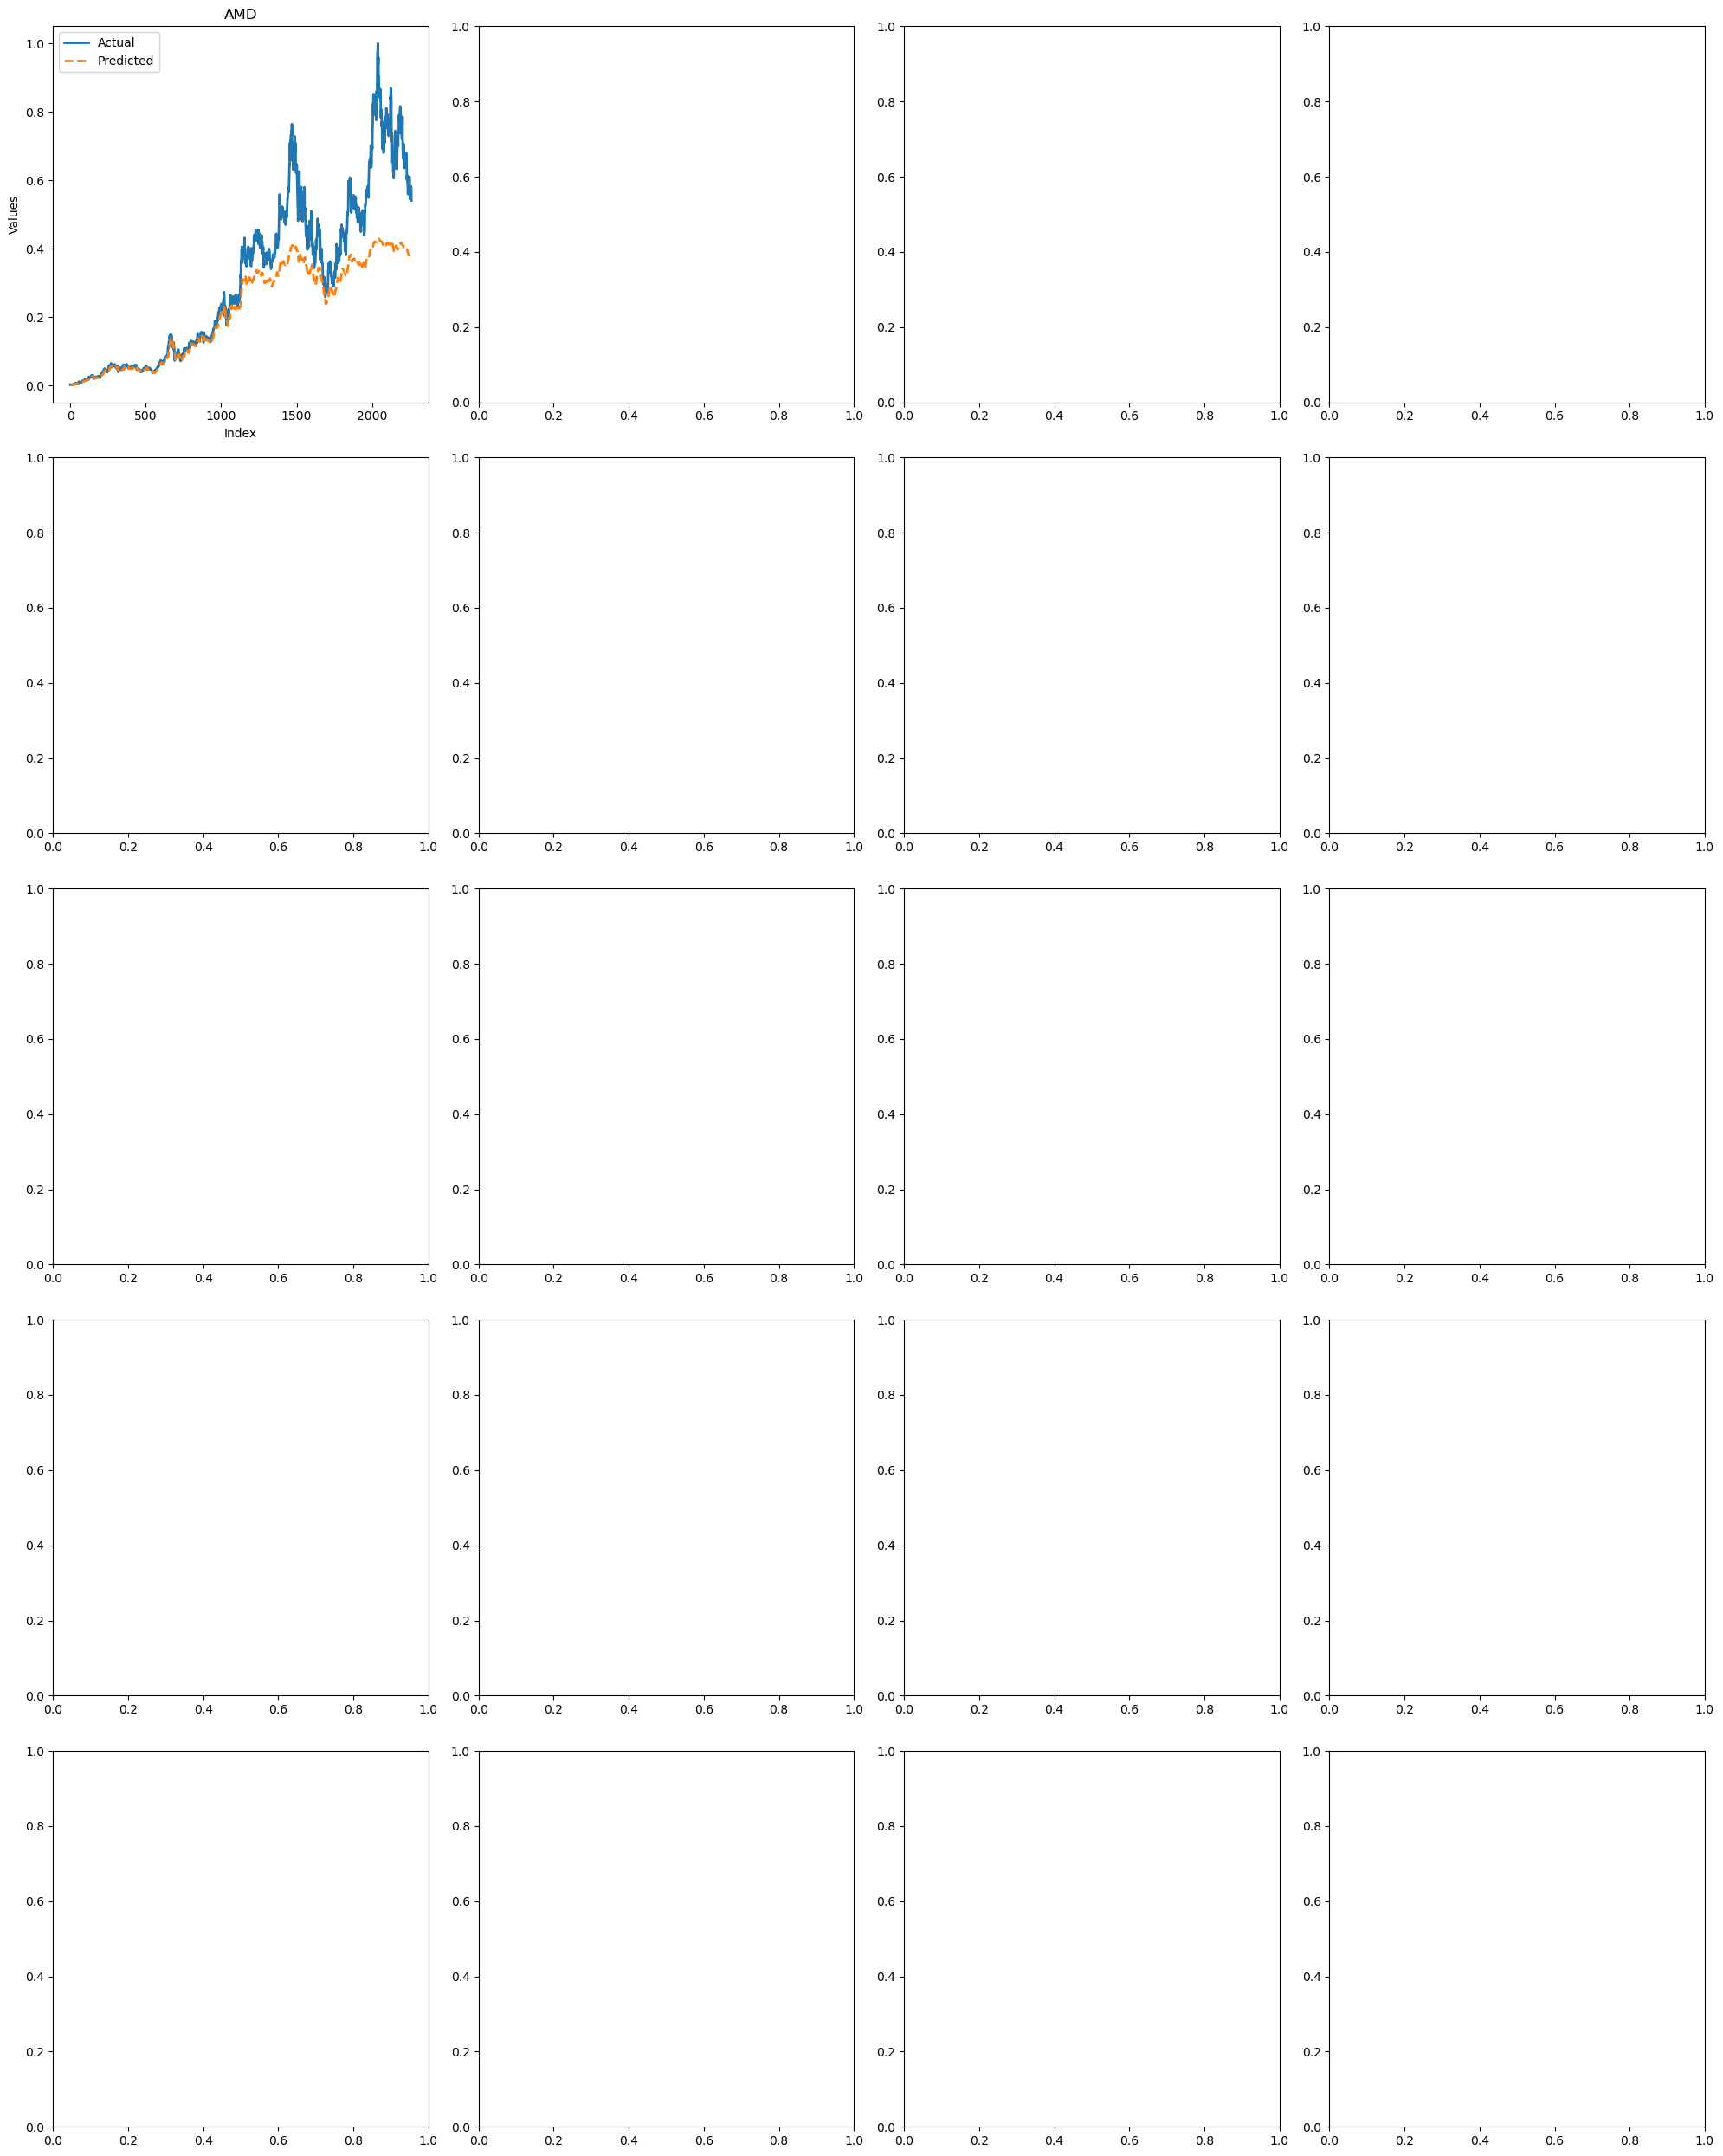

In [17]:
import matplotlib.pyplot as plt

# # Let's assume predictions and y_tests are already defined as described.
# predictions = [...]  # Replace [...] with your predictions list
# y_tests = [...]      # Replace [...] with your actual values, assumed to be a numpy array of numpy arrays

# Number of datasets
num_datasets = 1

# Setup the subplot dimensions (5 rows, 4 columns in this case)
fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Adjust the figsize as needed

# Loop through all datasets
for i in range(num_datasets):
    # Identify the correct subplot
    ax = axes[i // 4, i % 4]

    # Plot the actual values and predicted values
    ax.plot(Y_tests[i], label='Actual', linewidth=2)
    ax.plot(predictions[i], label='Predicted', linestyle='--', linewidth=2)

    # Formatting the graph
    ax.set_title(f'{ticker_names[i]}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


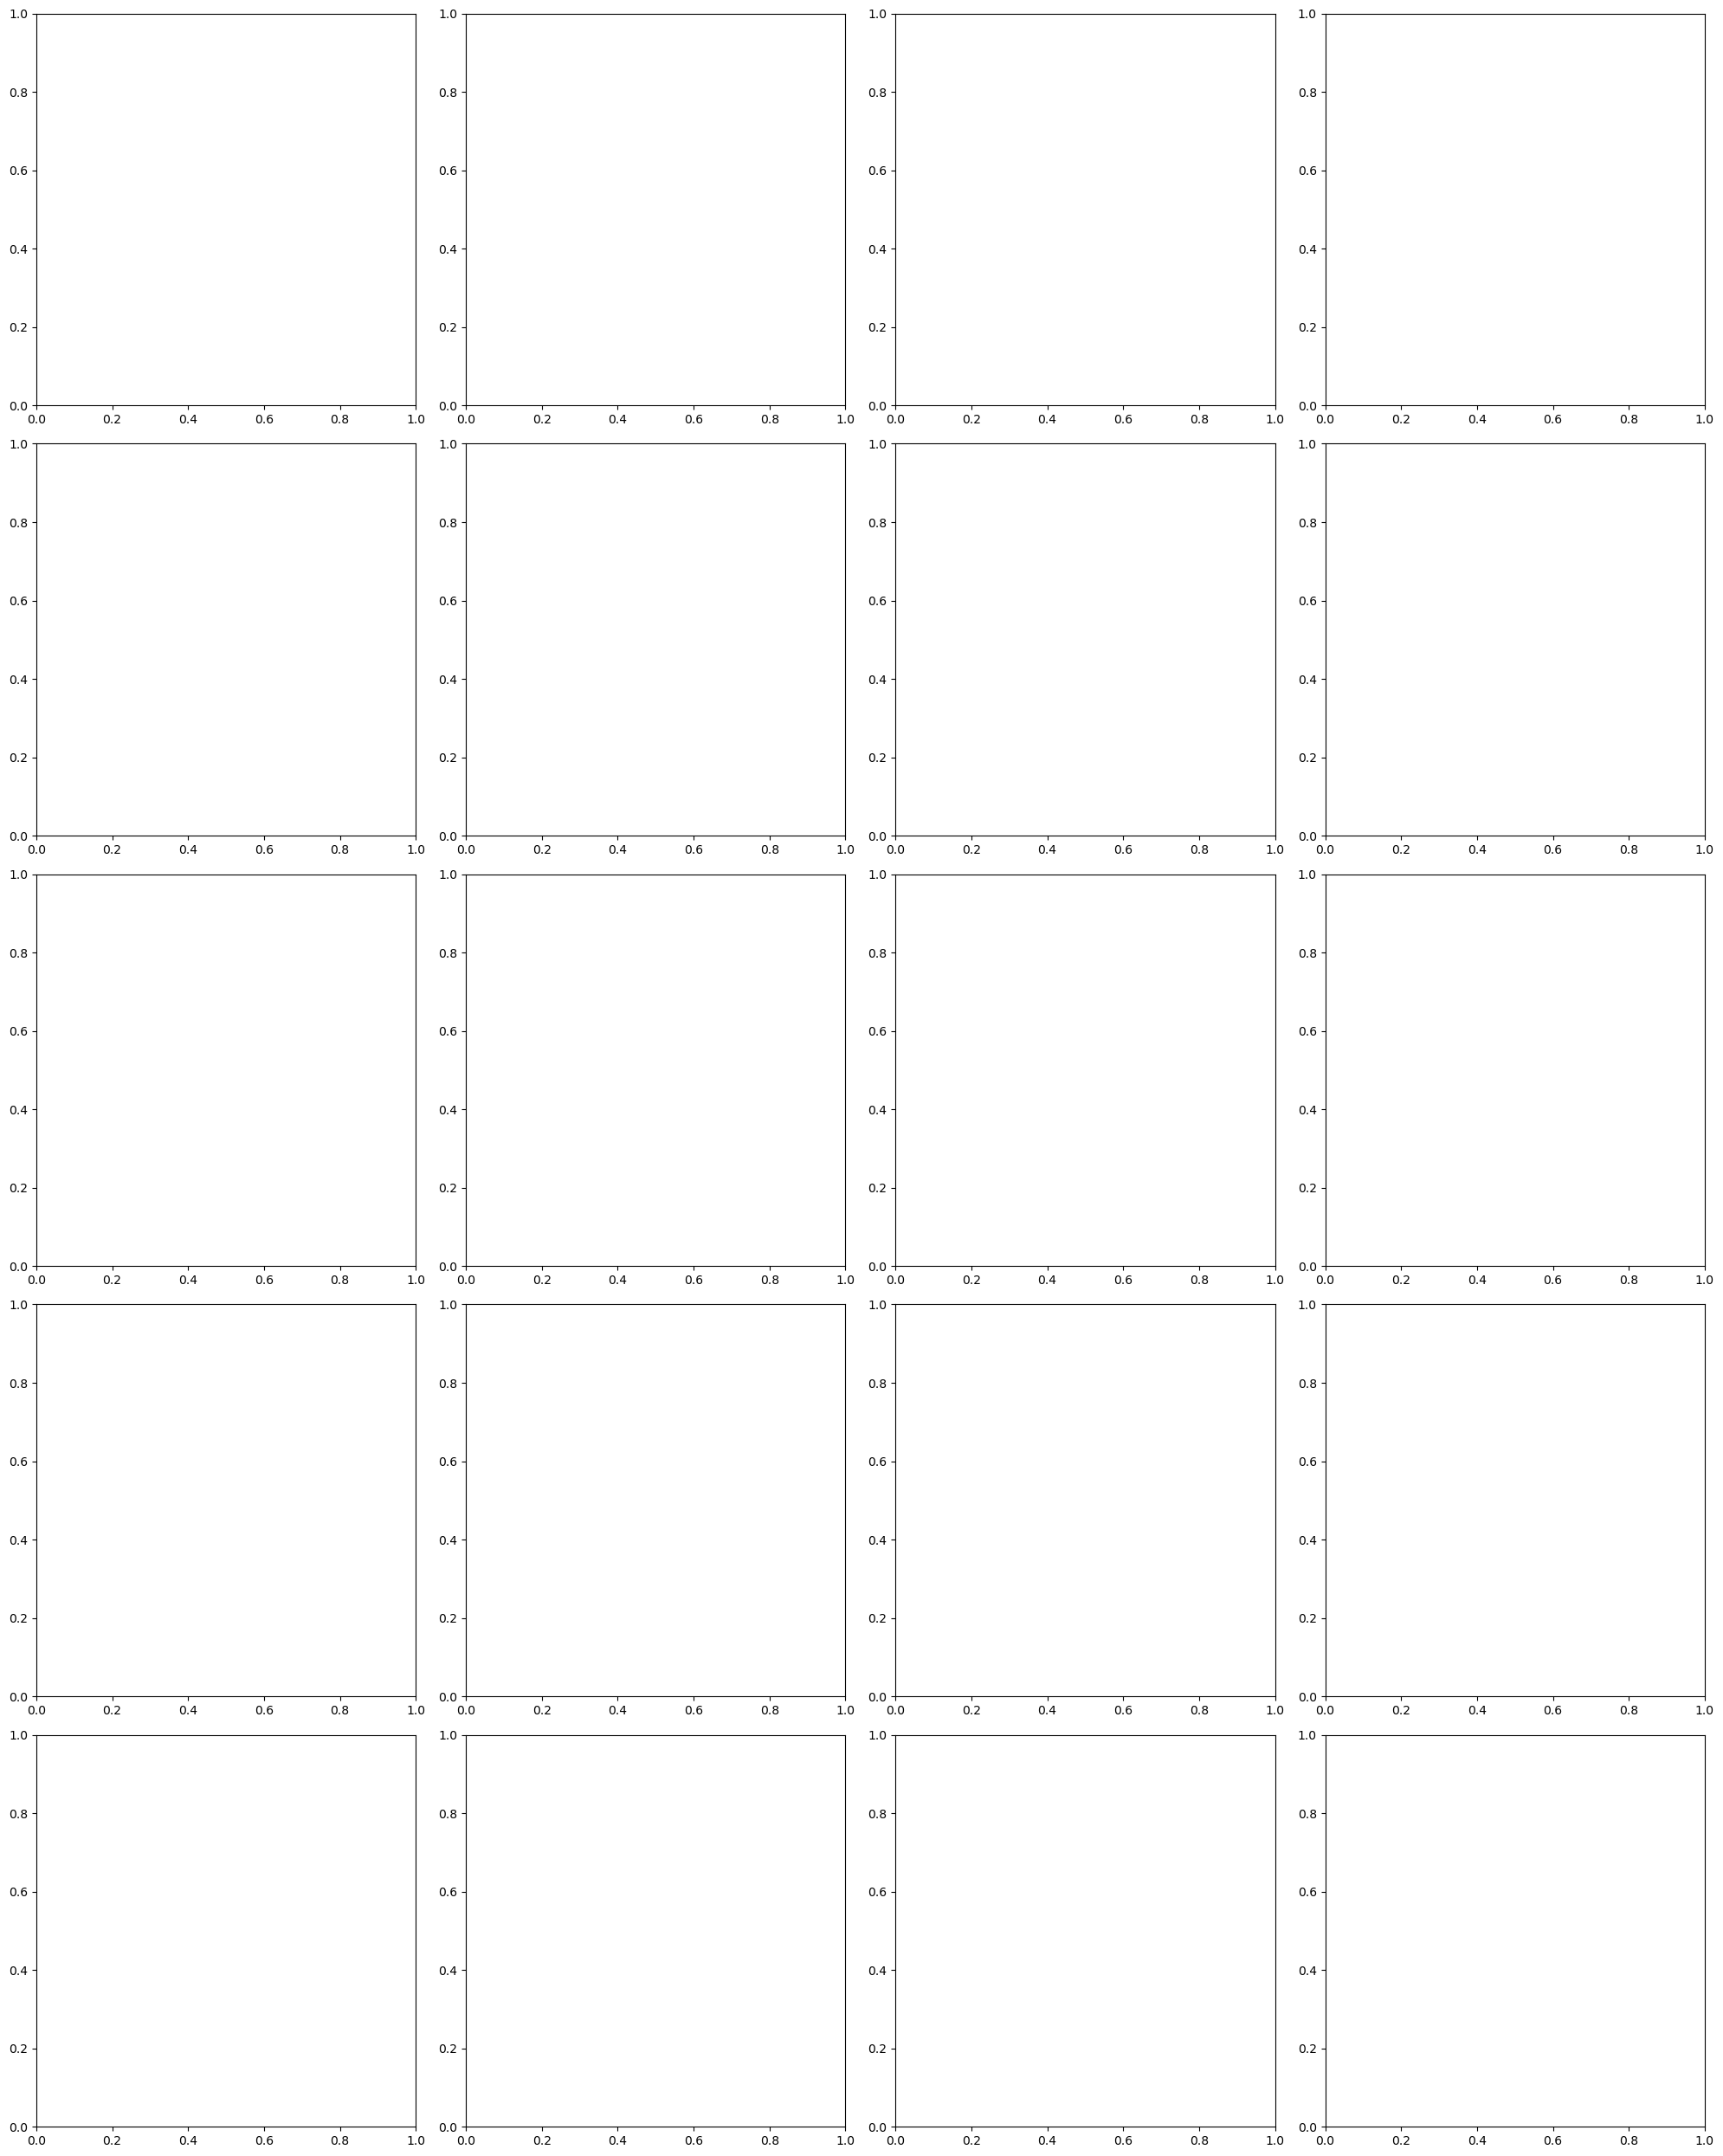

In [18]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

# # Let's assume predictions and y_tests are already defined as described.
# predictions = [...]  # Replace [...] with your predictions list
# y_tests = [...]      # Replace [...] with your actual values, assumed to be a numpy array of numpy arrays

# Number of datasets
num_datasets = 1

# Setup the subplot dimensions (5 rows, 4 columns in this case)
fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Adjust the figsize as needed

# Loop through all datasets
for i in range(num_datasets):
    # Identify the correct subplot

    historyi = histories[i]
    # Assuming 'history' is the history object returned from the 'fit()' method
    # Extract loss and validation loss
    loss = historyi.history['loss']
    val_loss = historyi.history.get('val_loss')  # 'None' if no validation loss

    # Create count of the number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot the actual values and predicted values
    ax.plot(loss, label='loss', linewidth=2)
    ax.plot(val_loss, label='Vloss', linestyle='--', linewidth=2)

    # Formatting the graph
    ax.set_title(f'{ticker_names[i]}')
    ax.set_xlabel('epochs')
    ax.set_ylabel('values')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [41]:
prediction = model.predict(X_test)
prediction


71/71 [==============================] - 0s 4ms/step


array([[0.00188253],
       [0.00207137],
       [0.00217141],
       ...,
       [0.37459284],
       [0.37591076],
       [0.37722588]], dtype=float32)

In [42]:
scaler_of_df.inverse_transform(prediction)

ValueError: cannot reshape array of size 2261 into shape (2261,4)

In [29]:
Y_test

array([0.00247902, 0.00176392, 0.00214531, ..., 0.57885201, 0.57789852,
       0.54057017])

In [34]:
df

,Open,High,Low,Close
0,0.000000,3.302083,3.125000,3.145833
1,0.000000,3.125000,2.937500,3.031250
2,0.000000,3.083333,3.020833,3.041667
3,0.000000,3.062500,3.010417,3.010417
4,0.000000,3.020833,2.906250,2.916667
...,...,...,...,...
11304,122.389999,123.750000,121.120003,122.279999
11305,123.080002,125.650002,121.910004,123.750000
11306,121.430000,123.709999,120.629997,123.040001
11307,124.550003,125.250000,122.230003,122.839996
